In [24]:
import pandas as pd
import numpy as np
import math

from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
csv_path = 'cash.csv'

data = pd.read_csv(csv_path)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TERMINAL_NUMBER   3266 non-null   int64 
 1   DATE              3266 non-null   object
 2   TRN_AMOUNT_CURR1  3266 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.7+ KB


In [14]:
data.isnull().sum()

TERMINAL_NUMBER     0
DATE                0
TRN_AMOUNT_CURR1    0
dtype: int64

In [15]:
data.TRN_AMOUNT_CURR1.max()

637350000

In [16]:
data.iloc[data.TRN_AMOUNT_CURR1.argmax()]

TERMINAL_NUMBER       1111101
DATE                3/19/2019
TRN_AMOUNT_CURR1    637350000
Name: 2827, dtype: object

97/12/28 tuesday

In [17]:
data.TRN_AMOUNT_CURR1.min()

0

In [18]:
data.iloc[data.TRN_AMOUNT_CURR1.argmin()]

TERMINAL_NUMBER       1111101
DATE                6/28/2010
TRN_AMOUNT_CURR1            0
Name: 283, dtype: object

thursday

In [19]:
data['DATE'] = pd.to_datetime(data.DATE)

In [20]:
data['Month'] = data.DATE.dt.month
data['Year'] = data.DATE.dt.year
data['Day'] = data.DATE.dt.day
data['Weekday'] = data.DATE.dt.day_name()

In [21]:
data.loc[data['Weekday']=="Friday"]

,TERMINAL_NUMBER,DATE,TRN_AMOUNT_CURR1,Month,Year,Day,Weekday
3077,1111101,2020-01-31,129250000,1,2020,31,Friday


Only one row belongs to Friday and its amount is high that can be related to an an unexpected event.

In [22]:
data.head()

,TERMINAL_NUMBER,DATE,TRN_AMOUNT_CURR1,Month,Year,Day,Weekday
0,1111101,2009-12-02,106530000,12,2009,2,Wednesday
1,1111101,2009-07-04,3400000,7,2009,4,Saturday
2,1111101,2009-07-08,2400000,7,2009,8,Wednesday
3,1111101,2009-07-09,42420000,7,2009,9,Thursday
4,1111101,2009-07-11,116480000,7,2009,11,Saturday


Text(0.5, 1.0, 'Average Cash per Day of Week')

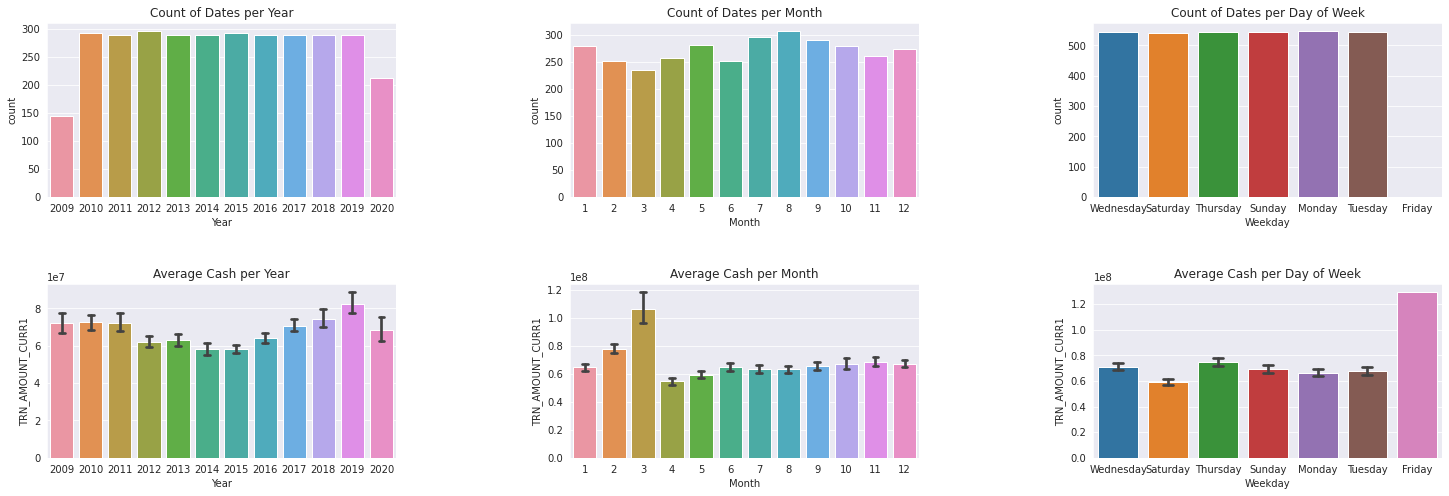

In [26]:
f, axes = plt.subplots(2, 3, figsize=(25,8))
plt.subplots_adjust(wspace=.5, hspace=.5)

sns.set_style('darkgrid')
sns.axes_style('darkgrid')

measure = data.TRN_AMOUNT_CURR1

# plots 1-3: counts
sns.countplot(x='Year', data=data, ax=axes[0,0]) \
            .set_title("Count of Dates per Year")

sns.countplot(x='Month', data=data, ax=axes[0,1]) \
            .set_title("Count of Dates per Month")
    
sns.countplot(x='Weekday', data=data, ax=axes[0,2]) \
            .set_title("Count of Dates per Day of Week")


# plots 4-6: means
sns.barplot(x=data.Year, y=measure, estimator=np.mean, capsize=.2, ax=axes[1,0]) \
            .set_title("Average Cash per Year")

sns.barplot(x=data.Month, y=measure, estimator=np.mean, capsize=.2, ax=axes[1,1]) \
            .set_title("Average Cash per Month")
    
sns.barplot(x=data.Weekday, y=measure, estimator=np.mean, capsize=.2, ax=axes[1,2]) \
            .set_title("Average Cash per Day of Week")
    

Text(0.5, 1.0, 'Boxplot of Cashes')

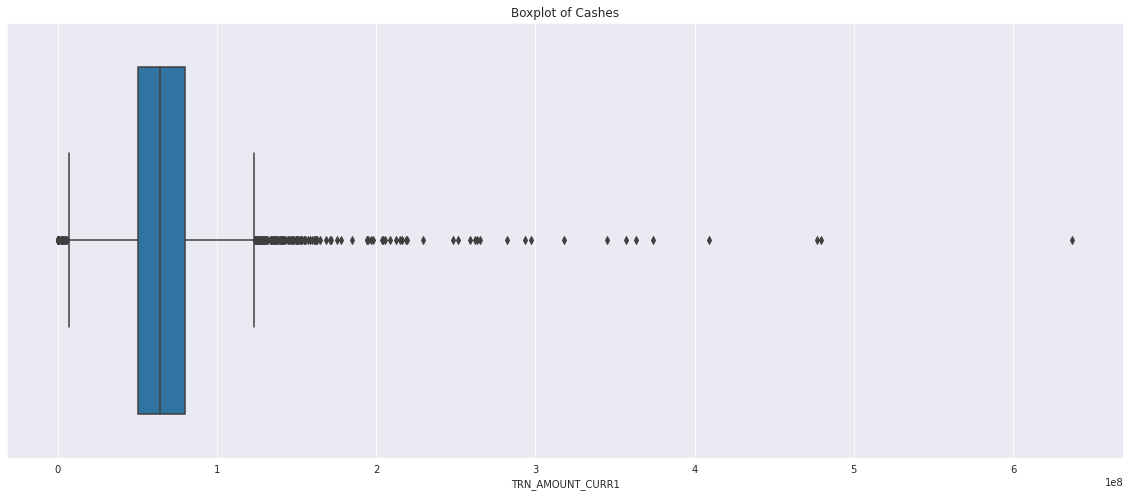

In [27]:
f, axes = plt.subplots(1, 1, figsize=(20,8))
plt.subplots_adjust(wspace=.5, hspace=.5)

sns.boxplot(x=data['TRN_AMOUNT_CURR1'], ax=axes) \
    .set_title("Boxplot of Cashes")

In [28]:
latest_date = str((data.DATE.max() + timedelta(days=1)).date())

In [29]:
dates = pd.date_range(
    '2009-07-04',
    latest_date, 
    freq="1D", 
    closed='left'
)

dates

DatetimeIndex(['2009-07-04', '2009-07-05', '2009-07-06', '2009-07-07',
               '2009-07-08', '2009-07-09', '2009-07-10', '2009-07-11',
               '2009-07-12', '2009-07-13',
               ...
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26'],
              dtype='datetime64[ns]', length=4103, freq='D')

In [30]:
dates = list(dates)

In [31]:
data = data.fillna(0)

In [32]:
data2= data.TRN_AMOUNT_CURR1.groupby([data['DATE']]).agg({'sum'})

In [33]:
data2 = data2.reindex(dates)

In [34]:
data2 = data2.fillna(0)

In [ ]:
data2.head(10)

Text(0.5, 1.0, 'Average Cash in 2019')

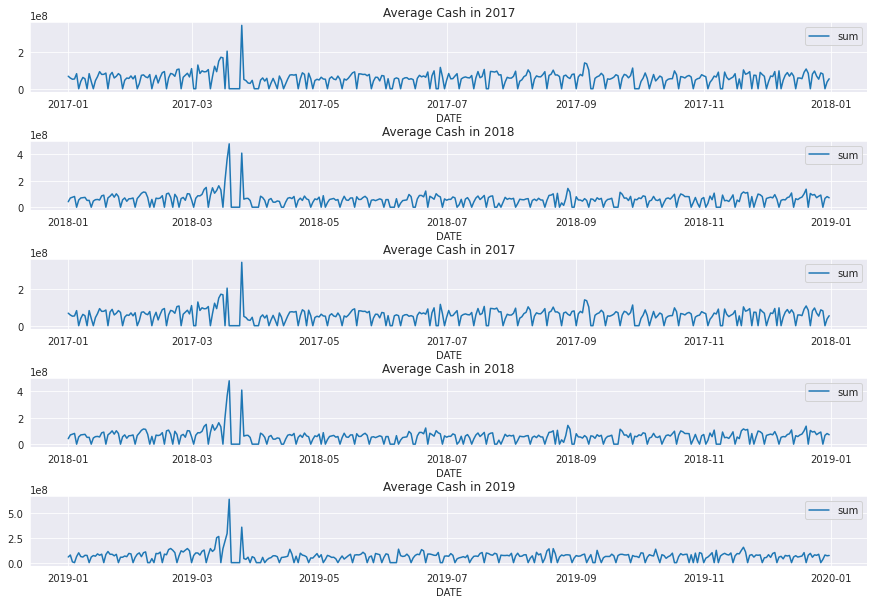

In [36]:
f, axes = plt.subplots(5, 1, figsize=(15,10))
plt.subplots_adjust(wspace=.5, hspace=.7)

sns.axes_style("darkgrid")

sns.lineplot(data=data2.loc['2017-01-01':'2017-12-31'], ax=axes[0]) \
            .set_title("Average Cash in 2017")

sns.lineplot(data=data2.loc['2018-01-01':'2018-12-31'], ax=axes[1]) \
            .set_title("Average Cash in 2018")

sns.lineplot(data=data2.loc['2017-01-01':'2017-12-31'], ax=axes[2]) \
            .set_title("Average Cash in 2017")

sns.lineplot(data=data2.loc['2018-01-01':'2018-12-31'], ax=axes[3]) \
            .set_title("Average Cash in 2018")

sns.lineplot(data=data2.loc['2019-01-01':'2019-12-31'], ax=axes[4]) \
            .set_title("Average Cash in 2019")

In [37]:
idx=data2.loc[data2['sum']==0]

In [38]:
idx=idx.index

In [39]:
print(idx)

DatetimeIndex(['2009-07-05', '2009-07-06', '2009-07-07', '2009-07-10',
               '2009-07-17', '2009-07-20', '2009-07-24', '2009-07-31',
               '2009-08-07', '2009-08-14',
               ...
               '2020-08-08', '2020-08-14', '2020-08-21', '2020-08-28',
               '2020-08-29', '2020-08-30', '2020-09-04', '2020-09-11',
               '2020-09-18', '2020-09-25'],
              dtype='datetime64[ns]', name='DATE', length=861, freq=None)


In [40]:
idxn=idx[:]+pd.Timedelta(days=1)

In [41]:
idx.shape

(861,)

In [42]:
idxp=idx[:]-pd.Timedelta(days=1)

In [43]:
for i in range(861):
  data2.loc[idx[i]]=(data2.loc[idxn[i]]+data2.loc[idxp[i]])/2

In [ ]:
data2.head(10)

In [ ]:
f, axes = plt.subplots(5, 1, figsize=(15,10))
plt.subplots_adjust(wspace=.5, hspace=.7)

sns.axes_style("darkgrid")

sns.lineplot(data=data2.loc['2017-01-01':'2017-12-31'], ax=axes[0]) \
            .set_title("Average Cash in 2017")

sns.lineplot(data=data2.loc['2018-01-01':'2018-12-31'], ax=axes[1]) \
            .set_title("Average Cash in 2018")

sns.lineplot(data=data2.loc['2017-01-01':'2017-12-31'], ax=axes[2]) \
            .set_title("Average Cash in 2017")

sns.lineplot(data=data2.loc['2018-01-01':'2018-12-31'], ax=axes[3]) \
            .set_title("Average Cash in 2018")

sns.lineplot(data=data2.loc['2019-01-01':'2019-12-31'], ax=axes[4]) \
            .set_title("Average Cash in 2019")

In [44]:
data2.shape

(4103, 1)

In [45]:
def get_lag_features(lag_step, unit, n):
    '''
    lag_step: number of hours to shift by for each feature n
    unit: 'hour', 'day', 'week', etc. 
    n: number of shift columns/features to create
    '''
    for i in range(1, n+1):
        
        col_name = unit + str(i) + '_lag_count' 
        
        shift = i * lag_step
        
        data2[col_name] = data2['sum'].shift(shift)

In [46]:
get_lag_features(1, 'day', 31) # Creates 31 1 day lags on amounts
data2.dropna(inplace=True) # Drop windows with NaN

In [47]:
data2 = data2.iloc[:, ::-1] # Reversal of column order
data2.head(5)

,day31_lag_count,day30_lag_count,day29_lag_count,day28_lag_count,day27_lag_count,day26_lag_count,day25_lag_count,day24_lag_count,day23_lag_count,day22_lag_count,day21_lag_count,day20_lag_count,day19_lag_count,day18_lag_count,day17_lag_count,day16_lag_count,day15_lag_count,day14_lag_count,day13_lag_count,day12_lag_count,day11_lag_count,day10_lag_count,day9_lag_count,day8_lag_count,day7_lag_count,day6_lag_count,day5_lag_count,day4_lag_count,day3_lag_count,day2_lag_count,day1_lag_count,sum
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-08-04,3400000.0,1700000.0,850000.0,1625000.0,2400000.0,42420000.0,79450000.0,116480000.0,107710000.0,57750000.0,74030000.0,48420000.0,59200000.0,50215000.0,41230000.0,77550000.0,111320000.0,145090000.0,125090000.0,106400000.0,87680000.0,68960000.0,85370000.0,65560000.0,70550000.0,56780000.0,47930000.0,49205000.0,50480000.0,58500000.0,40700000.0,29220000.0
2009-08-05,1700000.0,850000.0,1625000.0,2400000.0,42420000.0,79450000.0,116480000.0,107710000.0,57750000.0,74030000.0,48420000.0,59200000.0,50215000.0,41230000.0,77550000.0,111320000.0,145090000.0,125090000.0,106400000.0,87680000.0,68960000.0,85370000.0,65560000.0,70550000.0,56780000.0,47930000.0,49205000.0,50480000.0,58500000.0,40700000.0,29220000.0,86160000.0
2009-08-06,850000.0,1625000.0,2400000.0,42420000.0,79450000.0,116480000.0,107710000.0,57750000.0,74030000.0,48420000.0,59200000.0,50215000.0,41230000.0,77550000.0,111320000.0,145090000.0,125090000.0,106400000.0,87680000.0,68960000.0,85370000.0,65560000.0,70550000.0,56780000.0,47930000.0,49205000.0,50480000.0,58500000.0,40700000.0,29220000.0,86160000.0,99380000.0
2009-08-07,1625000.0,2400000.0,42420000.0,79450000.0,116480000.0,107710000.0,57750000.0,74030000.0,48420000.0,59200000.0,50215000.0,41230000.0,77550000.0,111320000.0,145090000.0,125090000.0,106400000.0,87680000.0,68960000.0,85370000.0,65560000.0,70550000.0,56780000.0,47930000.0,49205000.0,50480000.0,58500000.0,40700000.0,29220000.0,86160000.0,99380000.0,83760000.0
2009-08-08,2400000.0,42420000.0,79450000.0,116480000.0,107710000.0,57750000.0,74030000.0,48420000.0,59200000.0,50215000.0,41230000.0,77550000.0,111320000.0,145090000.0,125090000.0,106400000.0,87680000.0,68960000.0,85370000.0,65560000.0,70550000.0,56780000.0,47930000.0,49205000.0,50480000.0,58500000.0,40700000.0,29220000.0,86160000.0,99380000.0,83760000.0,68140000.0


In [ ]:
train_test_split = 0.85
val_test_split = 0.50

In [ ]:
data2.shape

(4072, 32)

In [ ]:
train_idx = math.ceil(len(data2) * train_test_split) # 3462
val_idx = math.ceil(len(data2[train_idx:]) * val_test_split) # 305

print('Train Indices: 0 - {} ({})\nTest Indices: {} - {} ({})'.format(
    train_idx - 1, train_idx,
    train_idx + val_idx, len(data2), len(data2) - (train_idx + val_idx))    
)

Train Indices: 0 - 3461 (3462)
Test Indices: 3767 - 4072 (305)


In [ ]:
train_set = data2[:train_idx + val_idx]
#val_set = data2[train_idx : train_idx + val_idx]
test_set = data2[train_idx + val_idx:]

print('Train: {}\nTest: {}'.format(
    train_set.shape,
    test_set.shape)
)

Train: (3767, 32)
Test: (305, 32)


In [ ]:
def split_X_y(df):
    
    features = df.iloc[:,:-1].values # All rows, all cols except last
    targets = df.iloc[:,-1].values.reshape((len(df), 1)) # all rows, last column, reshape to 2D vector

    return features, targets

In [ ]:
train_X, train_y = split_X_y(train_set)
#val_X, val_y = split_X_y(val_set)
test_X, test_y = split_X_y(test_set)

In [ ]:
print('train_X\n{}\n{}\n\ntrain_y\n{}\n{}'.format(train_X, train_X.shape, train_y, train_y.shape))

train_X
[[3.4000e+06 2.1250e+06 1.8750e+06 ... 5.0480e+07 5.8500e+07 4.0700e+07]
 [2.1250e+06 1.8750e+06 2.1375e+06 ... 5.8500e+07 4.0700e+07 2.9220e+07]
 [1.8750e+06 2.1375e+06 2.4000e+06 ... 4.0700e+07 2.9220e+07 8.6160e+07]
 ...
 [8.4600e+07 8.1850e+07 7.9100e+07 ... 1.0800e+08 9.0975e+07 7.3950e+07]
 [8.1850e+07 7.9100e+07 8.7425e+07 ... 9.0975e+07 7.3950e+07 8.0600e+07]
 [7.9100e+07 8.7425e+07 9.5750e+07 ... 7.3950e+07 8.0600e+07 5.5750e+07]]
(3767, 31)

train_y
[[29220000.]
 [86160000.]
 [99380000.]
 ...
 [80600000.]
 [55750000.]
 [76950000.]]
(3767, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [ ]:
train_X_scaled = x_scaler.fit_transform(train_X)

#val_X_scaled = x_scaler.transform(val_X)
test_X_scaled = x_scaler.transform(test_X)

In [ ]:
train_y_scaled = y_scaler.fit_transform(train_y)

#val_y_scaled = y_scaler.transform(val_y)
test_y_scaled = y_scaler.transform(test_y)

In [ ]:
print(train_X_scaled)

[[0.00525655 0.00325592 0.00286364 ... 0.07913071 0.09171505 0.06378472]
 [0.00325592 0.00286364 0.00327554 ... 0.09171505 0.06378472 0.04577122]
 [0.00286364 0.00327554 0.00368743 ... 0.06378472 0.04577122 0.1351169 ]
 ...
 [0.13266907 0.12835399 0.12403891 ... 0.16938647 0.14267221 0.11595795]
 [0.12835399 0.12403891 0.13710184 ... 0.14267221 0.11595795 0.12639259]
 [0.12403891 0.13710184 0.15016476 ... 0.11595795 0.12639259 0.08739997]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [ ]:
# Expanding dimensions on axis 2 to get 31 x 1 matrices for n_examples
train_X_scaled = np.expand_dims(train_X_scaled, axis=2)
#val_X_scaled = np.expand_dims(val_X_scaled, axis=2)
test_X_scaled = np.expand_dims(test_X_scaled, axis=2)

In [ ]:
print(train_X_scaled.shape) # 3767 examples 31 of 1 matrices.
#print(val_X_scaled.shape)
print(test_X_scaled.shape)

print(train_y_scaled.shape)
#print(val_y_scaled.shape)
print(test_y.shape)

(3767, 31, 1)
(305, 31, 1)
(3767, 1)
(305, 1)


In [ ]:
n_inputs = train_X_scaled.shape[2]
n_outputs = train_y.shape[1] 

batch_size = 512
steps_per_epoch = 50
epochs = 500

In [ ]:

def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,activation='relu'))        
        model.add(Dense(1,activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [ ]:
model = build_model([n_inputs,31,1])

In [ ]:
model.fit(
    train_X_scaled,
    train_y_scaled,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=val_test_split,
    steps_per_epoch=steps_per_epoch,
    verbose=0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 31, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 31, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 117,025
Trainable params: 117,025
Non-trainable params: 0
__________________________________________________

In [ ]:
trainScore = model.evaluate(train_X_scaled, train_y_scaled, verbose=0)
print('Train Score: %.3f MSE (%.3f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(test_X_scaled, test_y_scaled, verbose=0)
print('Test Score: %.3f MSE (%.3f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.002 MSE (0.039 RMSE)
Test Score: 0.002 MSE (0.047 RMSE)


In [ ]:
y_pred = model.predict(test_X_scaled)

In [ ]:
y_pred_unscaled = y_scaler.inverse_transform(y_pred)

In [ ]:
y_pred_unscaled.shape

(305, 1)

In [ ]:
for i in range(304):
  y_pred_unscaled[i]=y_pred_unscaled[i+1]

In [ ]:
for i in range(304):
  y_pred[i]=y_pred[i+1]

In [ ]:
y_pred_unscaled=np.delete(y_pred_unscaled,304,0)
y_pred=np.delete(y_pred,304,0)

In [ ]:
test_y_scaled=np.delete(test_y_scaled,304,0)
test_y=np.delete(test_y,304,0)

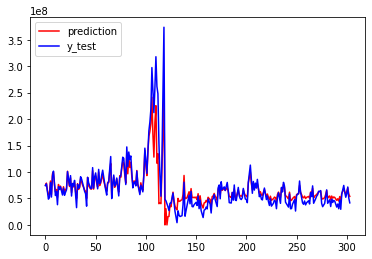

In [ ]:
import matplotlib.pyplot as plt2

plt2.plot(y_pred_unscaled,color='red', label='prediction')
plt2.plot(test_y,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()

In [ ]:
scaled_mse = mean_squared_error(y_pred=y_pred, y_true=test_y_scaled)

mse = mean_squared_error(y_pred=y_pred_unscaled, y_true=test_y)
rmse = np.sqrt(mse)

print('Test Set Performance:\n\nScaled MSE:\t{}\nUnscaled MSE:\t{}\nUnscaled RMSE:\t{}'.format(
    scaled_mse, 
    mse,
    rmse)
)

Test Set Performance:

Scaled MSE:	0.0010433798217993522
Unscaled MSE:	423770018203546.4
Unscaled RMSE:	20585675.072815716


In [ ]:
results = pd.DataFrame(test_y, columns=['y_true'])

results['y_pred'] = y_pred_unscaled

# Adding datetime index to results for graphing x-axis. 
# Slicing dates by the test dates' indices...
results['date'] = dates[-(len(test_y)):]
results.set_index('date', inplace=True, drop=True)

In [ ]:
idx.shape

(861,)

In [ ]:
for i in range(861):
  results.loc[results.index==idx[i]]=0

In [ ]:
results.shape

(304, 2)

In [ ]:
results.head()

,y_true,y_pred
date,,
2019-11-28,74200000.0,75158360.0
2019-11-29,0.0,0.0
2019-11-30,63175000.0,64849988.0
2019-12-01,48750000.0,56751100.0
2019-12-02,52000000.0,58289924.0


In [ ]:
results.to_csv('results.csv')

Text(0.5, 1.0, '(3/3) LSTM Predicted Cash vs. Actual')

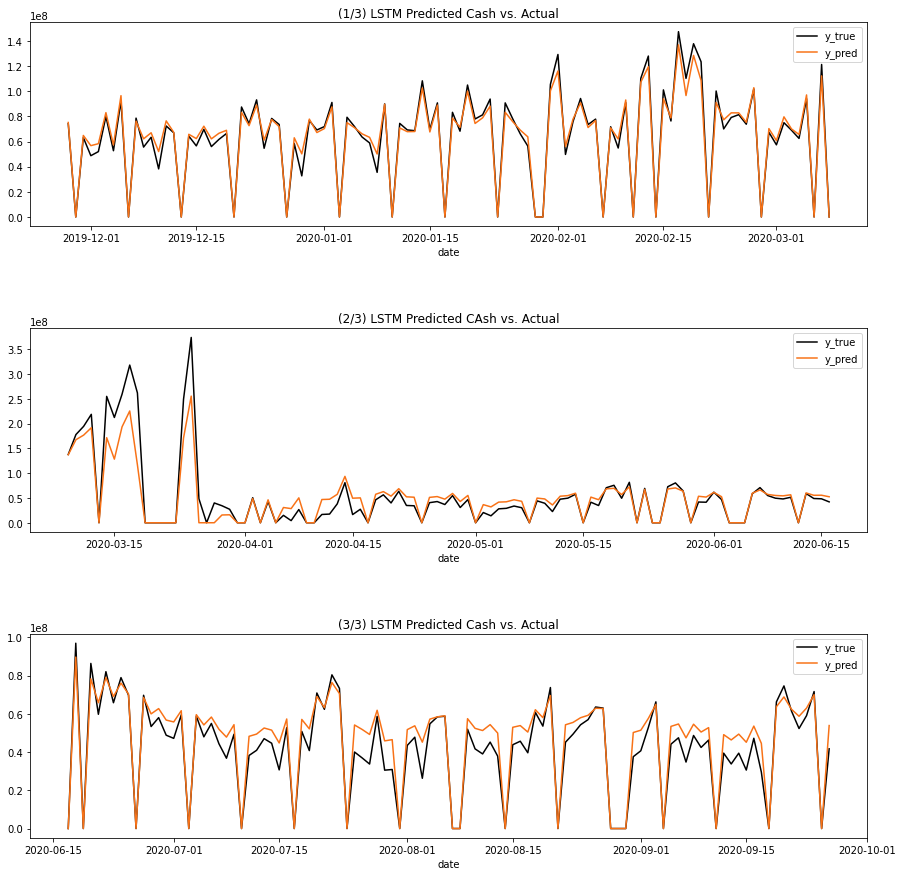

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(15,15))

plt.subplots_adjust(wspace=.5, hspace=.5)
idx_split = math.ceil(len(test_y) / 3)
palette = ['#000000', '#F87217']

sns.lineplot(data=results[:idx_split], ax=axes[0], palette=palette, dashes=False) \
            .set_title("(1/3) LSTM Predicted Cash vs. Actual")

sns.lineplot(data=results[idx_split:-idx_split], ax=axes[1], palette=palette, dashes=False) \
            .set_title("(2/3) LSTM Predicted CAsh vs. Actual")

sns.lineplot(data=results[-idx_split:], ax=axes[2], palette=palette, dashes=False) \
            .set_title("(3/3) LSTM Predicted Cash vs. Actual")

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(25,10))

sns.lineplot(data=results[:168], ax=axes, palette=palette, dashes=False) \
            .set_title("LSTM Predicted Cash vs. Actual: Closeup of Five Months")
plt.ylim(0,)

In [ ]:
diff=results['y_pred']-results['y_true']

In [ ]:
diff.head()

date
2019-11-28     958360.0
2019-11-29          0.0
2019-11-30    1674988.0
2019-12-01    8001100.0
2019-12-02    6289924.0
dtype: float64

In [ ]:
diff.to_csv('diff.csv')